# Part 3. Multi Level Perceptron from Scratch 

In the previous section, we attempted to train a simple 2 layer MLP on Keras. Keras, being a high level abstracted framework, hides the details behind the model and simplifies the process. We will now try to build our own 2 layer MLP, purely out of NumPy, which will unveil the hidden components of neural network training. Similar to past from-scratch attempts, we will start by creating a class.

## 1. Create a class `MLPTwoLayers`

- One of the starting points to take care of while building your network is to initialize your weight matrix correctly. Consider appropriate sizes for your input, hidden and output layers - your __init__ method should take in the params `input_size`, `hidden_size`, `output_size`. Then, using these variables, initialise the weights for the hidden layers `w1`, `w2`, `b1`, and `b2`.

In [400]:
import numpy as np

In [401]:
%load_ext autoreload
%autoreload 2
from src.mlp import MLPTwoLayers as MLP
import src.week4_func as wk4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [402]:
mlp = MLP(3072, 100, 10)
print(np.shape(mlp.w1),np.shape(mlp.w2),np.shape(mlp.b1),np.shape(mlp.b2))

(3072, 100) (100, 10) (100,) (10,)


## 2. Create a `forward ` method, which takes in a set of features
- Create the `forward` method to calculate the predicted class probabilities of an image. This is known as a forward pass.  You should wrap the hidden layer with a sigmoid function (or others if you prefer), and the output layer with a softmax function.

In [403]:
# import your data preparation methods here, ensure your data is randomized
df = wk4.just_dataframes('./data/cifar-10-batches-py/data_batch_1')
X = df.drop('target',axis=1).values/255
y = df['target'].values
preds = mlp.forward(X[0])
preds

array([3.75951385e-08, 3.48020497e-02, 1.46012324e-06, 5.94387783e-01,
       2.92810456e-05, 3.43488986e-01, 1.34959681e-06, 8.33167130e-03,
       4.72006712e-06, 1.89526607e-02])

In [404]:
mlp.x2a

array([3.75951385e-08, 3.48020497e-02, 1.46012324e-06, 5.94387783e-01,
       2.92810456e-05, 3.43488986e-01, 1.34959681e-06, 8.33167130e-03,
       4.72006712e-06, 1.89526607e-02])

## 3. Create a `loss` method, which takes in the predicted probability and actual label
- Compute the loss function: This is a function of the actual label y and predicted label y. It captures how far off our predictions are from the actual target. The objective is to minimize this loss function. 

In [405]:
train_loss = mlp.loss(preds, y[0])
train_loss

13.515704668991663

## 4. Create a `backward` method, which takes in the loss
- Using the backpropogation algorithm, execute the backward pass and adjust the weights and bias accordingly
- You can use a default learning rate of 1e-3 for this exercise. If you would like do otherwise, you can try to implement it as a parameter.

### Backpropogation math!
Cross entropy loss function, $J(\theta)=-\sum_{c=1}^{M}y_c log(h_{\theta,c}(x))$  
Where,  
$h_\theta(x)$ is the predicted probability of class $c$  
$\theta$ are the weights of your nn  
$m$ is the number of training examples (batch size in this case)  
  
Backpropogation is about finding the gradient of the cost function w.r.t the weights,  
$\large {\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial J(\theta)}{\partial a} * \frac{\partial a}{\partial z} * \frac{\partial z}{\partial \theta}}$  
Where,  
$z$ is the input to the node which is equal to output * weight of previous node.  
$a$ is the activation, which is the activated input $g(z)$, with $g()$ as the activation(sigmoid) function  
$l$ (used below) refers to the layer  
  
$\large{ \frac{\partial z}{\partial \theta} = a_{l-1}}$  
$\large{ \frac{\partial a}{\partial z} = \frac{\partial}{\partial z}g(z) = g'(z)}$  
$\large{ \frac{\partial J(\theta)}{\partial a} = ypred - y }$ if final layer (l=L). Else,  
$\large{ \frac{\partial J(\theta)}{\partial a} = \frac{\partial J(\theta)}{\partial a_{+1}} * \frac{\partial a_{+1}}{\partial z_{+1}} * \theta }$
  
To update theta,  
$\theta = \theta - \frac{\partial J(\theta)}{\partial \theta}$  
helpful [link](https://doug919.github.io/notes-on-backpropagation-with-cross-entropy/)

In [406]:
mlp.backward(train_loss)

Now, we can try training the model.

In [407]:
# initial attempt at training
test_loss = 0
for i in range(3000, 3500):
    test_loss += mlp.loss(mlp.forward(X[i]), y[i])
print(test_loss / 500)

11.4936888995


In [408]:
for i in range(10000):
    if ((i % 100)==0):
        print('Item {}'.format(i))
    mlp.backward(loss_graph.append(mlp.loss(mlp.forward(X[i]), y[i])))

Item 0
Item 100
Item 200
Item 300
Item 400
Item 500
Item 600
Item 700
Item 800
Item 900
Item 1000
Item 1100
Item 1200
Item 1300
Item 1400
Item 1500
Item 1600
Item 1700
Item 1800
Item 1900
Item 2000
Item 2100
Item 2200
Item 2300
Item 2400
Item 2500
Item 2600
Item 2700
Item 2800
Item 2900
Item 3000
Item 3100
Item 3200
Item 3300
Item 3400
Item 3500
Item 3600
Item 3700
Item 3800
Item 3900
Item 4000
Item 4100
Item 4200
Item 4300
Item 4400
Item 4500
Item 4600
Item 4700
Item 4800
Item 4900
Item 5000
Item 5100
Item 5200
Item 5300
Item 5400
Item 5500
Item 5600
Item 5700
Item 5800
Item 5900
Item 6000
Item 6100
Item 6200
Item 6300
Item 6400
Item 6500
Item 6600
Item 6700
Item 6800
Item 6900
Item 7000
Item 7100
Item 7200
Item 7300
Item 7400
Item 7500
Item 7600
Item 7700
Item 7800
Item 7900
Item 8000
Item 8100
Item 8200
Item 8300
Item 8400
Item 8500
Item 8600
Item 8700
Item 8800
Item 8900
Item 9000
Item 9100
Item 9200
Item 9300
Item 9400
Item 9500
Item 9600
Item 9700
Item 9800
Item 9900


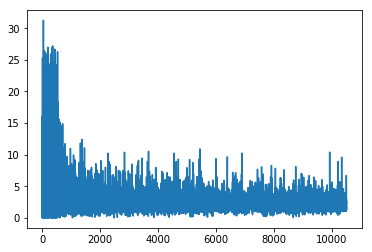

In [409]:
plt.plot(mlp.loss_collect)

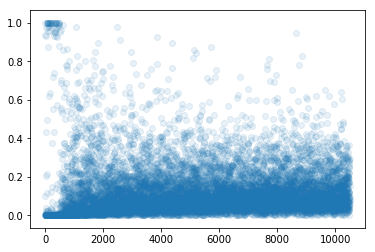

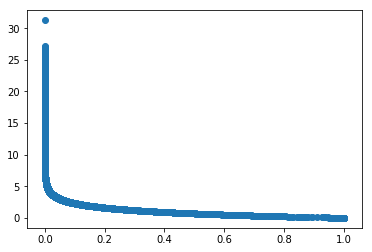

In [410]:
plt.figure(1)
plt.scatter(np.arange(len(mlp.correct)),mlp.correct,alpha=0.1)
plt.figure(2)
plt.scatter(mlp.correct,mlp.loss_collect)

Finally, re-test your model.

In [414]:
test_loss = 0
for i in range(3000, 3500):
    test_loss += mlp.loss(mlp.forward(X[i]), y[i])
print(test_loss / 500)

2.330535673828959


In [415]:
np.shape(mlp.t3_1.reshape(-1,1))
print(np.shape(mlp.t1_1),np.shape(mlp.t2_1.reshape(1,-1)),np.shape(mlp.t3_1),np.shape(mlp.big_delt1))

(100,) (1, 100) (3072,) (3072, 100)


In [416]:
print(mlp.y_pred)
print(mlp.y)
print(mlp.y_hot)
print(np.argmax(mlp.y_pred))
print(mlp.lossx)
print((mlp.w1))
print(mlp.x2a)
# print(mlp.t1_2)
# mlp.w2[:]=0
# np.dot(mlp.w2,mlp.t1_2)



[0.04365513 0.30394909 0.16251608 0.16521133 0.03696121 0.06434852
 0.10236853 0.04735717 0.01364503 0.05998791]
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1
[ 0.03756409  0.10290862  0.11511838  0.19110779  0.08539902 -0.94370633
  0.29853821  0.06814392  0.01749351  0.0274328 ]
[[ 0.59223222  1.09315446  0.62232131 ... -0.97978096 -1.66987993
  -0.87996517]
 [-0.29656501  0.63761514  0.0477541  ...  0.18210719 -0.88293979
   0.38359475]
 [-0.76853606  0.78635952  1.39218657 ...  0.07595923  0.9241994
   0.2019445 ]
 ...
 [ 1.56326063 -0.79805755 -0.25829058 ... -0.2806704   1.17989208
  -0.14678428]
 [-0.86467255 -1.12511555 -0.6638375  ...  2.79000797  0.80404569
   0.32586139]
 [-0.89968526  0.62650923  1.19709679 ... -1.01918753  0.45265107
  -1.30665607]]
[0.04365513 0.30394909 0.16251608 0.16521133 0.03696121 0.06434852
 0.10236853 0.04735717 0.01364503 0.05998791]


Hopefully, you see that your test loss has decreased after training!

# Part 4. Convolutional Neural Network (CNN)
Please attempt this section only after you have completed the rest!

In the previous part, you implemented a multilayer perceptron network on CIFAR-10. The implementation was simple but not very modular since the loss and gradient were computed in a single monolithic function. This is manageable for a simple two-layer network, but would become impractical as you move to bigger models. Ideally, you want to build networks using a more modular design so that you can implement different layer types in isolation and then snap them together into models with different architectures.

In this part of exercise, you will implement a close to state-of-the-art deep learning model for CIFAR-10 with the Keras Deep Learning library. In addition to implementing convolutional networks of various depth, you will need to explore different update rules for optimization, and introduce **Dropout** as a regularizer, **Batch Normalization** and **Data Augmentation** as a tool to more efficiently optimize deep networks.

We saw models performing >98% accuracy on `CIFAR-10`, while most state-of-the-art models cross the 97% boundary. In general, models beyond **95%** are fairly decent.

## Reading resources

[Dropout](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer) is a regularization technique for overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.

[Batch Normalization](https://pdfs.semanticscholar.org/c1ba/ed41e4bc9401b1b2ec8ef55ba45543f7a1a3.pdf) is a technique to provide any layer in a neural network with inputs that are zero mean/unit variance.

[Data Augmentation](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced) means increasing the number of data points. In terms of images, it may mean that increasing the number of images in the dataset.

- Enhancing the performance of you existing model in part 2 with convolutional neural networks
- The implementation of model should be done by using Keras (or PyTorch)
- Train your designed model 
- Improve performance with algorithm tuning: Dropout, Batch normalization, Data augmentation and other optimizers

In [431]:
# Small test with pytorch first
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
df_1 = wk4.just_dataframes('./data/cifar-10-batches-py/data_batch_1')
df_test = wk4.just_dataframes('./data/cifar-10-batches-py/test_batch')
X_all = df_1.drop('target',axis=1).values/255
X_train = X_all
X_train = X_train.reshape(-1,3,32,32,order='C')
y_train = df_1['target'].values
X_test = df_test.drop('target',axis=1).values/255
X_test = X_test.reshape(-1,3,32,32,order='C')
y_test = df_test['target'].values

In [373]:

np.shape(X_train)

(10000, 3, 32, 32)

In [1]:
train_data = TensorDataset(torch.from_numpy(X_train).float(),torch.from_numpy(y_train))
trainloader = DataLoader(train_data,batch_size=10,shuffle=True)
test_data = TensorDataset(torch.from_numpy(X_test).float(),torch.from_numpy(y_test))
testloader = DataLoader(test_data,batch_size=10,shuffle=False)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.batchnorm4 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.batchnorm1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batchnorm2(x)
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.batchnorm3(x)
        x = F.relu(self.fc2(x))
        x = self.batchnorm4(x)
        x = self.fc3(x)
        return x
net=Net()
# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
def train_model(net,trainloader,criterion,optimizier):
    for epoch in range(5):  # loop over the dataset multiple times

        running_loss = 0.0
        for i,data in enumerate(trainloader):
            # get the inputs
            inputs, labels = data #otherwise

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 200 == 199:    # print every 200 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
                running_loss = 0.0

    print('Finished Training')
    return net
net = train_model(net,trainloader,criterion,optimizer)

NameError: name 'TensorDataset' is not defined

In [440]:
def scoring(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
#             images, labels = data['image'],data['target'] # if using object data constructor
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
scoring(net,testloader)

Accuracy of the network on the 10000 test images: 51 %


In [426]:
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)